# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [470]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])


Ori_combined_data_df = pd.DataFrame(combined_data)
combined_data_df = pd.DataFrame(combined_data)


In [471]:
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [472]:
# Checking the number of mice.
mice_count = len(combined_data_df["Mouse ID"].unique())
mice_count

249

In [473]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df[combined_data_df.duplicated()]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [474]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df[combined_data_df[['Mouse ID','Timepoint']].duplicated(keep = False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [475]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
combined_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'],  keep=False, inplace=True)


In [476]:
#Count remaining 'g989'
g989_count= combined_data_df.loc[combined_data_df["Mouse ID"]=="g989"]
g989_count

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1195,g989,25,56.045564,1,Propriva,Female,21,26
1380,g989,30,59.082294,1,Propriva,Female,21,26
1592,g989,35,62.570880,2,Propriva,Female,21,26


In [477]:
#Remove remaining 'g989'
combined_data_df.drop(combined_data_df.loc[combined_data_df["Mouse ID"]=="g989"].index, inplace=True)

In [478]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = len(combined_data_df["Mouse ID"].unique())
mice_count_cleaned

248

## Summary Statistics

In [479]:
import numpy as np

In [480]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.  
grouped_tumor_statistic = combined_data_df.groupby("Drug Regimen").agg(mean_tumor_volume=("Tumor Volume (mm3)","mean"),
                                                                median_tumor_volume=("Tumor Volume (mm3)","median"),
                                                                var_tumor_volume=("Tumor Volume (mm3)","var"),     
                                                                sd_tumor_volume=("Tumor Volume (mm3)","std"),  
                                                                sd_err_tumor_volume=("Tumor Volume (mm3)","sem"))

In [481]:
# Assemble the resulting series into a single summary DataFrame.

#Creating summary_statistic

summary_statistic_df = pd.DataFrame({
                                  "Mean Tumor Volume":grouped_tumor_statistic["mean_tumor_volume"],
                                   "Median Tumor Volume":grouped_tumor_statistic["median_tumor_volume"],
                                    "Tumor Volume Variance":grouped_tumor_statistic["var_tumor_volume"],
                                    "Tumor Volume Std. Dev.":grouped_tumor_statistic["sd_tumor_volume"],
                                    "Tumor Volume Std. Err.":grouped_tumor_statistic["sd_err_tumor_volume"]
                                   })

summary_statistic_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [482]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_statistic_list = combined_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
tumor_statistic_list

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [483]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#group mice tested & count how many for each group
mice_t = (combined_data.groupby('Drug Regimen').count()['Mouse ID'])
mice_tested = pd.DataFrame((mice_t).sort_values(ascending=False))

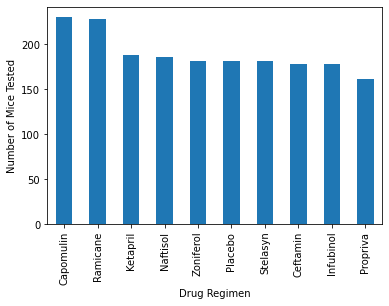

<Figure size 432x288 with 0 Axes>

In [484]:
# Create a bar chart based off of the group series from before
count_chart = mice_tested.plot(kind='bar', figsize=(6,4),legend='',align="center")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()

In [485]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#group mice tested & count how many for each group
x_axis = np.arange(len(mice_tested['Mouse ID']))

Text(0, 0.5, 'Number of Mice Tested')

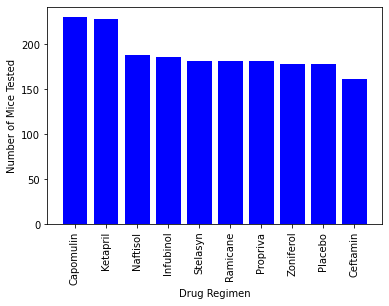

In [486]:
# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'])
plt.xticks(rotation='vertical')
plt.bar(x_axis, mice_tested['Mouse ID'], color='b',  align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [613]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = combined_data_df['Sex'].value_counts()
gender

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

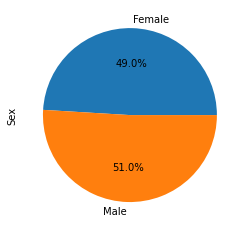

In [488]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# DataFrame of each student and the votes they get
pie_1 = pd.DataFrame({'gender': ['Male', 'Female'],
                      'Sex': [958,922]}) 
  
# Plotting the pie chart for above dataframe
pie_1.groupby(['gender']).sum().plot(
    kind='pie', y='Sex', autopct='%1.1f%%', legend = '')


In [489]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
met_total = combined_data_df['Sex'].count()

female_group = combined_data_df.query('Sex=="Female"')
female_perc =  (len(female_group)/met_total)*100

male_group = combined_data_df.query('Sex=="Male"')
male_perc =  (len(male_group)/met_total)*100


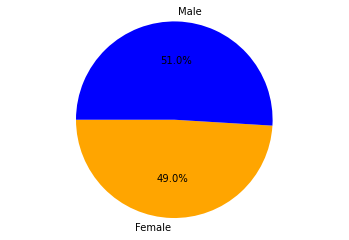

In [490]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = ["Female", "Male"]
pie_votes = [female_perc, male_perc]
colors = ["orange","blue"]
explode = (0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [491]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_max_timepoint = combined_data_df.groupby(["Mouse ID"])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = mice_max_timepoint.merge(combined_data_df,on=['Mouse ID','Timepoint'],how="left")
# final_tumor_df
   


In [501]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Plotting = [ ]

for drug in Drug_Regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volume = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    Plotting.append(volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


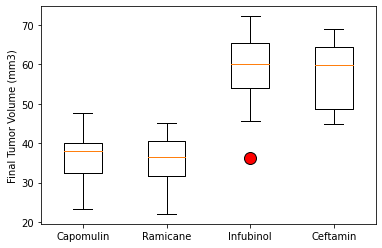

In [502]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(Plotting, labels = Drug_Regimen,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


In [503]:
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Line and Scatter Plots

In [504]:
l509=combined_data_df.loc[combined_data_df["Mouse ID"]=="l509"]
# l509

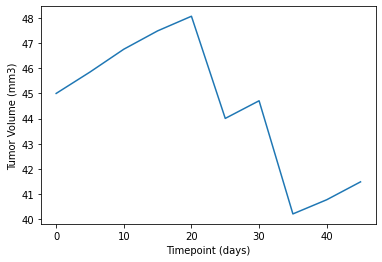

In [505]:
# Create Line Charter for Mouse ID - l509
y_capomulin_tumor_vol = [45.000000,45.851193,46.759074,47.488599,48.070452,44.006257,
                         44.708055,40.207288,40.770813,41.483008]
x_capomulin_timepoint = [0,5,10,15,20,25,30,35,40,45]



x1 = np.array(x_capomulin_timepoint)
y1 = np.array(y_capomulin_tumor_vol)
plt.plot(x1, y1)
plt.xlabel('Timepoint (days)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)

plt.show()   


In [507]:
final_tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


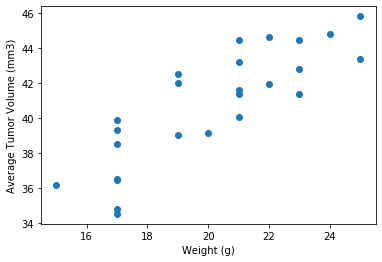

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



In [640]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen = ["Capomulin"]

# Create empty list to fill with tumor vol data & Weight (for plotting)
y_Avg_Tumor_Vol = [ ]
x_Weight = []

for drug in Drug_Regimen:
       
    volume = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    volume_Avg = (volume).mean()
    Weight_1 = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, 'Weight (g)']
    Weight_avg = (Weight_1).mean()
    
    y_Avg_Tumor_Vol.append(volume)
    x_Weight.append(Weight_1)

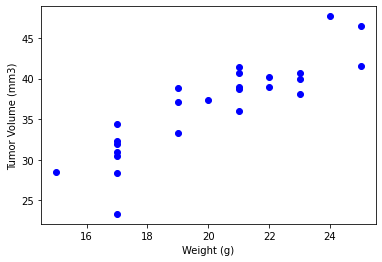

In [637]:

plt.scatter(x_Weight, y_Avg_Tumor_Vol, marker="o", facecolors="b", edgecolors="blue")
plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)
# plt.ylim(34, 46)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


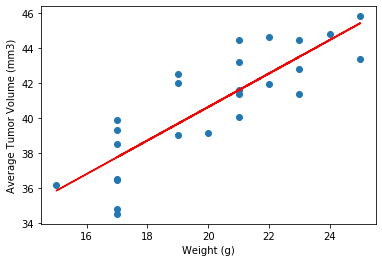

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



In [660]:
from scipy.stats import linregress
from scipy.stats import stats

C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:184: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\andre\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


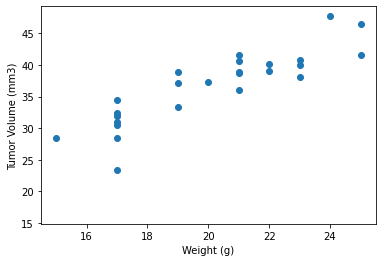

In [666]:
# plt.scatter(x_Weight, y_Avg_Tumor_Vol, marker="o", facecolors="b", edgecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Weight, y_Avg_Tumor_Vol)
regress_values = x_Weight * int(slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_Weight,y_Avg_Tumor_Vol)
plt.plot(x_Weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=10)
plt.show()